In [117]:
#https://github.com/HurinHu/GoogleNews/blob/master/README.md
from datetime import datetime
import numpy as np
import pandas as pd
import time
import re
from tqdm import tqdm
import json 
from GoogleNews import GoogleNews
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stichwortsuche Google Robert Enke

In [71]:
googlenews = GoogleNews(lang='de',period="d",start='01/01/2009',end='12/31/2019')

In [72]:
googlenews.search('Robert Enke')

In [76]:
#get results of search pages
for page_no in range(1,500):
    googlenews.getpage(page_no)

In [88]:
attributes=["title","media","date","description","link"]
json_list=[]

for page_no in tqdm(range(1,500)):
    googlenews.getpage(page_no)
    for search_result in googlenews.result():
        json_file={k:np.nan for k in attributes}

        json_file["title"]=search_result["title"]
        json_file["media"]=search_result["media"]
        json_file["date"]=search_result["date"]
        json_file["description"]=search_result["desc"]
        json_file["link"]=search_result["link"]

        json_list.append(json_file)

100%|██████████| 499/499 [04:45<00:00,  1.75it/s]


In [89]:
df=pd.DataFrame(json_list)

In [90]:
df.shape

(88323, 5)

In [91]:
df.head()

,title,media,date,description,link
0,Selbstmord – Nationaltorwart Robert Enke ist tot,WELT ONLINE,10 nov. 2009,Der deutsche Nationaltorwart Robert Enke hat s...,https://www.welt.de/sport/fussball/article5162...
1,"""Er war in den eigenen Ansprüchen gefangen""",Spiegel Online,14 nov. 2009,Robert Enkes Selbstmord hat Deutschland erschü...,https://www.spiegel.de/sport/fussball/robert-e...
2,Der Plan der Witwe,sueddeutsche.de,9 nov. 2010,Robert Enke: Todestag:Der Plan der Witwe. Ein ...,https://www.sueddeutsche.de/sport/vor-dem-erst...
3,Experte: Enke plante Selbstmord lange vorher,T-Online,13 nov. 2009,Hatte der an Depressionen erkrankte Robert Enk...,https://www.t-online.de/sport/id_20564724/robe...
4,Gedenken an Robert Enke - Was hat sein Tod ver...,NDR.de,5 nov. 2019,,https://www.ndr.de/sport/fussball/Gedenken-an-...


In [95]:
df["year"]=df["date"].apply(lambda x: x[-4:])

In [101]:
with pd.ExcelWriter(r'C:\Users\rbwes\Desktop\Yannick_Daten\Google\Google_[Robert_Enke].xlsx') as writer:
    df.to_excel(writer)

In [108]:
df["date_2"]=df.apply(lambda x: pd.to_datetime(int(x["year"]),format="%Y"),axis=1)

Text(0.5, 0, 'Time')

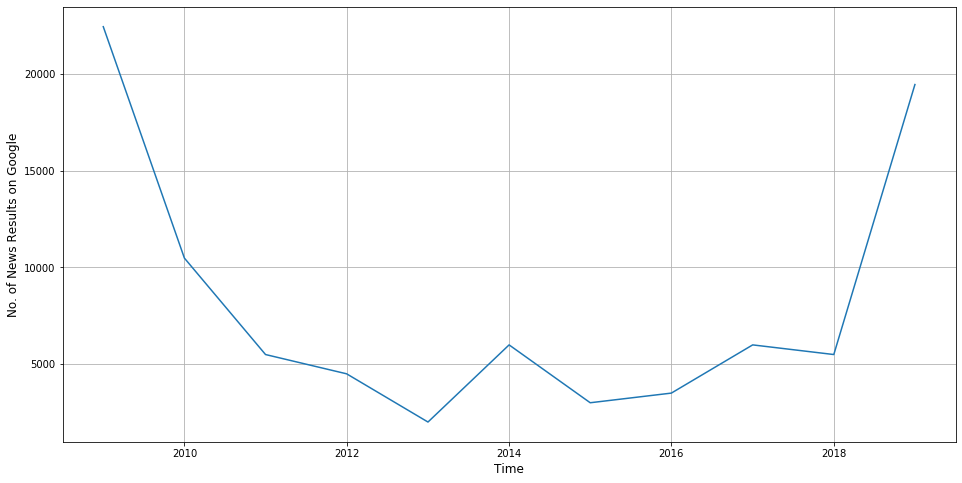

In [123]:
no_of_news=df.groupby("date_2").count()
fig,sub=plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x=no_of_news.index,y=no_of_news["title"],ax=sub)
sub.grid()
sub.set_ylabel("No. of News Results on Google",fontdict={"fontsize":12})
sub.set_xlabel("Time",fontdict={"fontsize":12})